# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [42]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train(6).csv")
rawvalid = pd.read_csv("Validation(2).csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [43]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [44]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [45]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
# history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               768       
                                                                 
 dense_45 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1539 (6.01 KB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


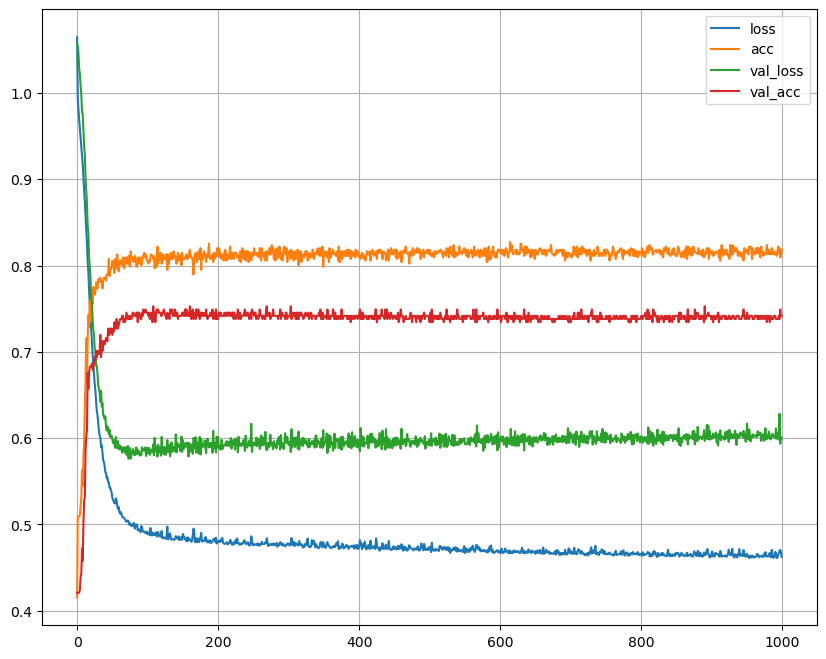

In [46]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [47]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.5999248623847961
Validation accuracy: 0.7416974306106567


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

##### First adding the features F3 and F4 as well

In [48]:
# Getting the features and normalizing
f1f2f3f4 = ["F1", "F2", "F3", "F4"]

x_train_f1f2f3f4 = train[f1f2f3f4]
x_mean_train_f1f2f3f4 = np.mean(x_train_f1f2f3f4)
x_train_f1f2f3f4_norm = x_train_f1f2f3f4 - x_mean_train_f1f2f3f4

x_valid_f1f2f3f4 = valid[f1f2f3f4]
x_mean_valid_f1f2f3f4 = np.mean(x_valid_f1f2f3f4)
x_valid_f1f2f3f4_norm = x_valid_f1f2f3f4 - x_mean_valid_f1f2f3f4

# Create a model with a single hidden layer
model_f1f2f3f4 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4.summary()

# Train the model
model_f1f2f3f4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
# history_f1f2f3f4 = model_f1f2f3f4.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history_f1f2f3f4 = model_f1f2f3f4.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 256)               1280      
                                                                 
 dense_47 (Dense)            (None, 3)                 771       
                                                                 
Total params: 2051 (8.01 KB)
Trainable params: 2051 (8.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


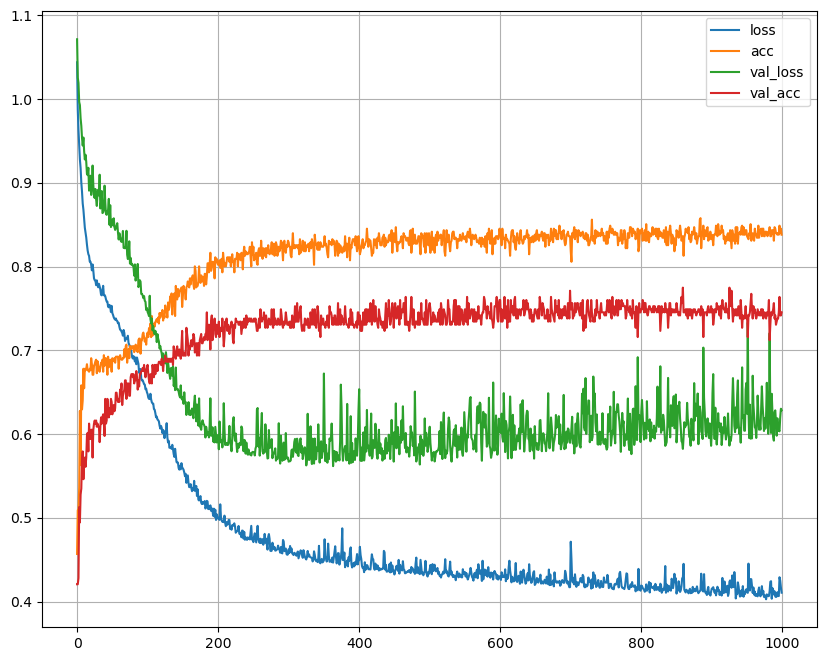

In [49]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4.history['loss'],label='loss')
plt.plot(history_f1f2f3f4.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [50]:
# Validation model
score_f1f2f3f4 = model_f1f2f3f4.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4[0])
print('Validation accuracy:', score_f1f2f3f4[1])

Validation loss: 0.6284104585647583
Validation accuracy: 0.7453874349594116


##### Running with F1-F4 and B1-B4

In [51]:
f1f2f3f4b1b2b3b4 = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

x_train_f1f2f3f4b1b2b3b4 = train[f1f2f3f4b1b2b3b4]
x_mean_train_f1f2f3f4b1b2b3b4 = np.mean(x_train_f1f2f3f4b1b2b3b4)
x_train_f1f2f3f4b1b2b3b4_norm = x_train_f1f2f3f4b1b2b3b4 - x_mean_train_f1f2f3f4b1b2b3b4

x_valid_f1f2f3f4b1b2b3b4 = valid[f1f2f3f4b1b2b3b4]
x_mean_valid_f1f2f3f4b1b2b3b4 = np.mean(x_valid_f1f2f3f4b1b2b3b4)
x_valid_f1f2f3f4b1b2b3b4_norm = x_valid_f1f2f3f4b1b2b3b4 - x_mean_valid_f1f2f3f4b1b2b3b4

# Create a model with a single hidden layer
model_f1f2f3f4b1b2b3b4 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4b1b2b3b4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4b1b2b3b4.summary()

# Train the model
model_f1f2f3f4b1b2b3b4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model
# history_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.fit(x_train_f1f2f3f4b1b2b3b4_norm, y_train, validation_data=(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.fit(x_train_f1f2f3f4b1b2b3b4_norm, y_train, validation_data=(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               2304      
                                                                 
 dense_49 (Dense)            (None, 3)                 771       
                                                                 
Total params: 3075 (12.01 KB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


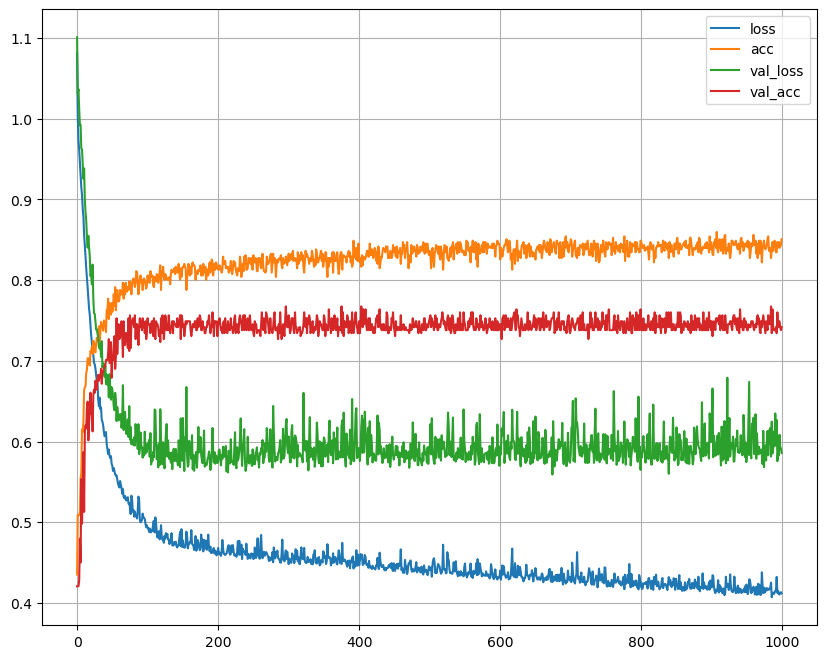

In [52]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4b1b2b3b4.history['loss'],label='loss')
plt.plot(history_f1f2f3f4b1b2b3b4.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4b1b2b3b4.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4b1b2b3b4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [53]:
# Validation model
score_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.evaluate(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4b1b2b3b4[0])
print('Validation accuracy:', score_f1f2f3f4b1b2b3b4[1])

Validation loss: 0.585749089717865
Validation accuracy: 0.7416974306106567


When using F1-F4 the accuracy goes up from when only using F1-F2. However, when also adding B1-B4 the accuracy goes down. This also occured during exerice 2.

As explained there, the cause for this can be because of the curse of dimensionality. This means that the more features we add, the more data we need to train the model. If we do not have enough data, the model will not be able to generalize well.

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

All tests here are done with F1-F4 since they give the best results.

First we reduce the number of hidden nodes to 128

In [54]:
# Create a model with a single hidden layer
model_f1f2f3f4_128 = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_128.summary()

# Train the model
model_f1f2f3f4_128.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_128 = model_f1f2f3f4_128.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

# Create a model with a single hidden layer with dropout equal to 50%
model_f1f2f3f4_128_dropout = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_128_dropout.summary()

# Train the model
model_f1f2f3f4_128_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_128_dropout = model_f1f2f3f4_128_dropout.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               640       
                                                                 
 dense_51 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               640       
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                

In [55]:
# Validation model
score_f1f2f3f4_128 = model_f1f2f3f4_128.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4_128[0])
print('Validation accuracy:', score_f1f2f3f4_128[1])

score_f1f2f3f4_128_dropout = model_f1f2f3f4_128_dropout.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss with dropout:', score_f1f2f3f4_128_dropout[0])
print('Validation accuracy with dropout:', score_f1f2f3f4_128_dropout[1])

Validation loss: 0.5704086422920227
Validation accuracy: 0.7343173623085022
Validation loss with dropout: 0.589955747127533
Validation accuracy with dropout: 0.7343173623085022


The accuracy goes a bit down when reducing the number of hidden nodes. This is because the model is not as complex. However, this reduction is not very big.

When also using dropout, this increases the accuracy a little. This is because we remove the dependencies between the nodes on the weights. This means that the model is more robust and can generalize better.

Now we increase the number of hidden nodes to 512

In [56]:
# Create a model with a single hidden layer
model_f1f2f3f4_512 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_512.summary()

# Train the model
model_f1f2f3f4_512.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_512 = model_f1f2f3f4_512.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

# Create a model with a single hidden layer with dropout equal to 50%
model_f1f2f3f4_512_dropout = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_512_dropout.summary()

# Train the model
model_f1f2f3f4_512_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_512_dropout = model_f1f2f3f4_512_dropout.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               2560      
                                                                 
 dense_55 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 4099 (16.01 KB)
Trainable params: 4099 (16.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 512)               2560      
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                              

In [57]:
# Validation model
score_f1f2f3f4_512 = model_f1f2f3f4_512.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4_512[0])
print('Validation accuracy:', score_f1f2f3f4_512[1])

score_f1f2f3f4_512_dropout = model_f1f2f3f4_512_dropout.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss with dropout:', score_f1f2f3f4_512_dropout[0])
print('Validation accuracy with dropout:', score_f1f2f3f4_512_dropout[1])

Validation loss: 0.6408708095550537
Validation accuracy: 0.7380073666572571
Validation loss with dropout: 0.5887020826339722
Validation accuracy with dropout: 0.7343173623085022


When increasing the number of hidden nodes, the accuracy goes up. This is because the model is more complex and can learn more complex patterns.

The accuracy goes down a little when using dropout. This can be because the dropout rate is too high.

## Problem 3
Add multiple layers to the network and observe the results.

Still using the F1-F4 features

In [58]:
# Create a model with a single hidden layer
model_f1f2f3f4_three_layers = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_three_layers.summary()

# Train the model
model_f1f2f3f4_three_layers.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_three_layers = model_f1f2f3f4_three_layers.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

# With dropout equal to 20%
# Create a model with a single hidden layer
model_f1f2f3f4_three_layers_dropout = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_three_layers_dropout.summary()

# Train the model
model_f1f2f3f4_three_layers_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_three_layers_dropout = model_f1f2f3f4_three_layers_dropout.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 512)               2560      
                                                                 
 dense_59 (Dense)            (None, 256)               131328    
                                                                 
 dense_60 (Dense)            (None, 128)               32896     
                                                                 
 dense_61 (Dense)            (None, 3)                 387       
                                                                 
Total params: 167171 (653.01 KB)
Trainable params: 167171 (653.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              P

In [59]:
# Validation model
score_f1f2f3f4_three_layers = model_f1f2f3f4_three_layers.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4_three_layers[0])
print('Validation accuracy:', score_f1f2f3f4_three_layers[1])

score_f1f2f3f4_three_layers_dropout = model_f1f2f3f4_three_layers_dropout.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss with dropout:', score_f1f2f3f4_three_layers_dropout[0])
print('Validation accuracy with dropout:', score_f1f2f3f4_three_layers_dropout[1])

Validation loss: 2.6782522201538086
Validation accuracy: 0.7380073666572571
Validation loss with dropout: 1.7727826833724976
Validation accuracy with dropout: 0.7195571660995483


Using two layers

In [60]:
# Create a model with a single hidden layer
model_f1f2f3f4_two_layers = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_two_layers.summary()

# Train the model
model_f1f2f3f4_two_layers.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_two_layers = model_f1f2f3f4_two_layers.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

# With dropout equal to 20%
# Create a model with a single hidden layer
model_f1f2f3f4_two_layers_dropout = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_two_layers_dropout.summary()

# Train the model
model_f1f2f3f4_two_layers_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_two_layers_dropout = model_f1f2f3f4_two_layers_dropout.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 256)               1280      
                                                                 
 dense_67 (Dense)            (None, 128)               32896     
                                                                 
 dense_68 (Dense)            (None, 3)                 387       
                                                                 
Total params: 34563 (135.01 KB)
Trainable params: 34563 (135.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 256)               1280      
                                                          

In [62]:
# Validation model
score_f1f2f3f4_two_layers = model_f1f2f3f4_two_layers.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4_two_layers[0])
print('Validation accuracy:', score_f1f2f3f4_two_layers[1])

score_f1f2f3f4_two_layers_dropout = model_f1f2f3f4_two_layers_dropout.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss with dropout:', score_f1f2f3f4_two_layers_dropout[0])
print('Validation accuracy with dropout:', score_f1f2f3f4_two_layers_dropout[1])

Validation loss: 1.0242258310317993
Validation accuracy: 0.723247230052948
Validation loss with dropout: 0.9889920353889465
Validation accuracy with dropout: 0.7269372940063477


The performance without dropout goes down with two layers, but when using dropout it is better than with three layers.

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

To predict the gender of the speaker, can use a neural network with two output nodes, one for each gender. The input can be features (F1-F4 for the first network, F1-F4+B1-B4 for the second network).

Could use all phonemes for training, but I am going to just use the phonemes from before.

In [126]:
# First getting labels for training and validation sets
genders = ["F", "M"]

gender_train_f1f2f3f4 = train[f1f2f3f4]
gender_valid_f1f2f3f4 = valid[f1f2f3f4]

# Normalize the data
gender_train_f1f2f3f4 = gender_train_f1f2f3f4 - np.mean(gender_train_f1f2f3f4)
gender_valid_f1f2f3f4 = gender_valid_f1f2f3f4 - np.mean(gender_valid_f1f2f3f4)

y_train_g = keras.utils.to_categorical([genders.index(g) for g in train["Gender"]], len(genders))
y_valid_g = keras.utils.to_categorical([genders.index(g) for g in valid["Gender"]], len(genders))

In [130]:
model_f1f2f3f4_gender = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=gender_train_f1f2f3f4.shape[1]),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax, input_dim=256)
])
model_f1f2f3f4_gender.summary()

model_f1f2f3f4_gender.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_gender = model_f1f2f3f4_gender.fit(gender_train_f1f2f3f4, y_train_g, validation_data=(gender_valid_f1f2f3f4, y_valid_g),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 256)               1280      
                                                                 
 dense_99 (Dense)            (None, 2)                 514       
                                                                 
Total params: 1794 (7.01 KB)
Trainable params: 1794 (7.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


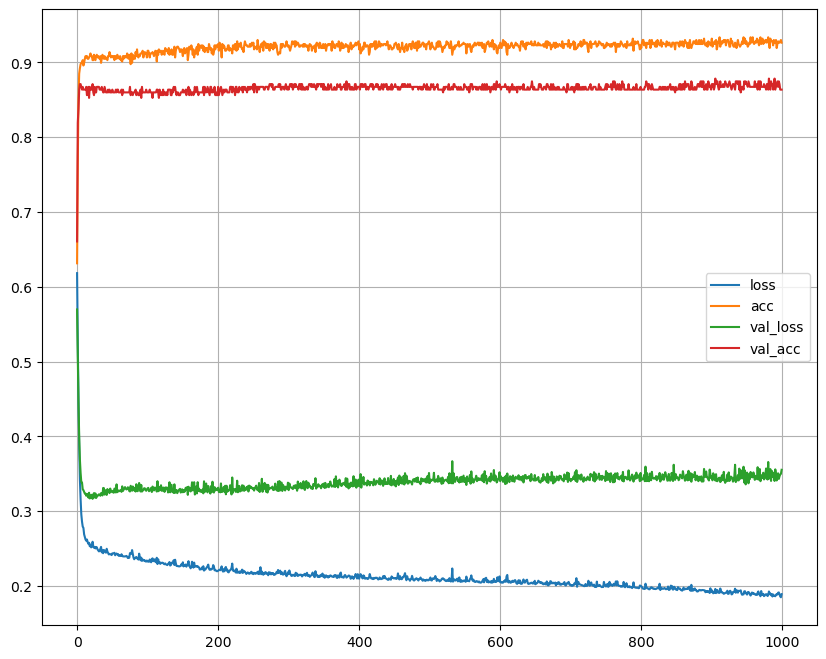

In [131]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4_gender.history['loss'],label='loss')
plt.plot(history_f1f2f3f4_gender.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4_gender.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4_gender.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [132]:
# Validation model
score_f1f2f3f4_gender = model_f1f2f3f4_gender.evaluate(gender_valid_f1f2f3f4, y_valid_g, verbose=0)
print('Validation loss:', score_f1f2f3f4_gender[0])
print('Validation accuracy:', score_f1f2f3f4_gender[1])

Validation loss: 0.355236679315567
Validation accuracy: 0.8634686470031738


Now also using the features B1-B4

In [ ]:
gender_train_f1f2f3f4b1b2b3b4 = train[f1f2f3f4b1b2b3b4]
gender_valid_f1f2f3f4b1b2b3b4 = valid[f1f2f3f4b1b2b3b4]

# Normalize the data
gender_train_f1f2f3f4b1b2b3b4 = gender_train_f1f2f3f4b1b2b3b4 - np.mean(gender_train_f1f2f3f4b1b2b3b4)
gender_valid_f1f2f3f4b1b2b3b4 = gender_valid_f1f2f3f4b1b2b3b4 - np.mean(gender_valid_f1f2f3f4b1b2b3b4)